Generally the first cell is to import the libraries that will be used. 

In [16]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

%matplotlib inline

Now I'm going to import the dataset I'm interested in analyzing.

In [17]:
acc_df = dmba.load_data('AccidentsFull.csv')
acc_df.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0


In [18]:
acc_df.shape

(42183, 24)

In [19]:
acc_df.columns

Index(['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'INJURY_CRASH', 'NO_INJ_I',
       'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'],
      dtype='object')

In [20]:
acc_df = acc_df.rename(columns={'MANCOL_I_R': 'Collision','NO_INJ_I':'InjuryNum', 'FATALITIES':'Fatal', 'ALIGN_I':'Align','PED_ACC_R':'PedInvolved','SPD_LIM':'SpeedLim','VEH_INVL':'VehNum'})
acc_df.columns

Index(['HOUR_I_R', 'ALCHL_I', 'Align', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'Collision', 'PedInvolved', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SpeedLim', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VehNum', 'WEATHER_R', 'INJURY_CRASH', 'InjuryNum',
       'PRPTYDMG_CRASH', 'Fatal', 'MAX_SEV_IR'],
      dtype='object')

In [21]:
acc_df2 = acc_df[['Collision','InjuryNum','Fatal','Align','PedInvolved','SpeedLim','VehNum']]

In [22]:
acc_df2

,Collision,InjuryNum,Fatal,Align,PedInvolved,SpeedLim,VehNum
0,0,1,0,2,0,40,1
1,2,0,0,1,0,70,2
2,2,0,0,1,0,35,2
3,2,0,0,1,0,35,2
4,2,0,0,1,0,25,3
...,...,...,...,...,...,...,...
42178,0,0,0,1,0,45,1
42179,0,1,0,1,0,55,1
42180,0,0,0,2,0,55,1
42181,0,0,0,1,0,65,1


In [23]:
acc_df2.describe()

,Collision,InjuryNum,Fatal,Align,PedInvolved,SpeedLim,VehNum
count,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000
mean,1.337079,0.778702,0.011047,1.131546,0.040514,43.547875,1.816964
std,0.929756,1.035169,0.104524,0.338000,0.197164,12.948396,0.684843
min,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,40.000000,2.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,55.000000,2.000000
max,2.000000,31.000000,1.000000,2.000000,1.000000,75.000000,23.000000


In [24]:
acc_df2.loc[acc_df2['Collision'] == 2, 'InjuryNum'].sum()

22750

In [25]:
acc_df2.loc[acc_df2['Collision'] == 1, 'InjuryNum'].sum()

1282

In [26]:
acc_df2.loc[acc_df2['Collision'] == 0, 'InjuryNum'].sum()

8816

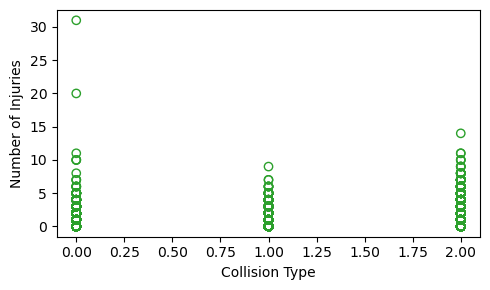

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(acc_df2.Collision, acc_df2.InjuryNum, color='C2', facecolor='none')
plt.xlabel('Collision Type')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()

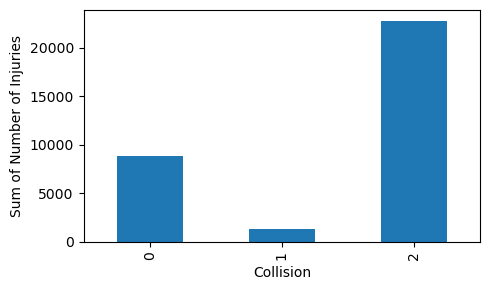

In [28]:
ax = acc_df2.groupby('Collision').sum().InjuryNum.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Injuries')

plt.tight_layout()
plt.show()

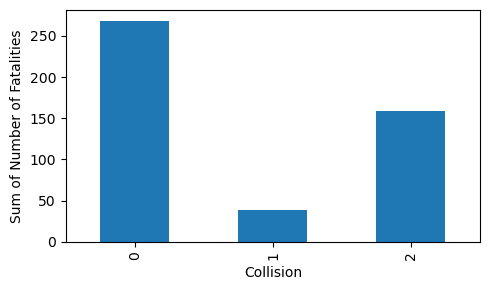

In [29]:
ax = acc_df2.groupby('Collision').sum().Fatal.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Fatalities')

plt.tight_layout()
plt.show()

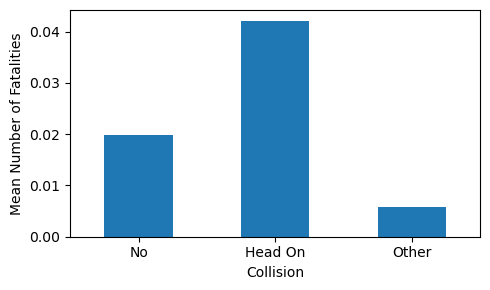

In [151]:
ax = acc_df2.groupby('Collision').mean().Fatal.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Mean Number of Fatalities')

xLabel = ['No', 'Head On', 'Other']

ax.set_xticklabels(xLabel, rotation=0)

plt.tight_layout()
plt.show()

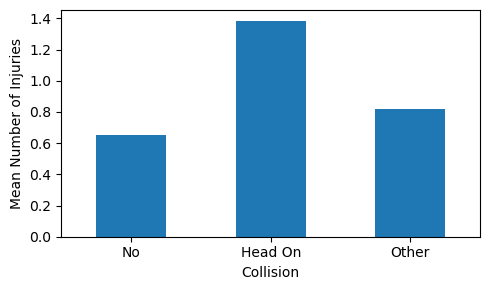

In [152]:
ax = acc_df2.groupby('Collision').mean().InjuryNum.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Mean Number of Injuries')

xLabel = ['No', 'Head On', 'Other']

ax.set_xticklabels(xLabel, rotation=0)

plt.tight_layout()
plt.show()

In [30]:
print("Check for Missing Values")
missingValues = acc_df2.isnull().sum().sort_values(ascending=False)
missingValues

Check for Missing Values


Collision      0
InjuryNum      0
Fatal          0
Align          0
PedInvolved    0
SpeedLim       0
VehNum         0
dtype: int64

In [32]:
#make a dataframe for just head-on collisions
headOn_df = acc_df2[acc_df2['Collision']==1]
headOn_df

,Collision,InjuryNum,Fatal,Align,PedInvolved,SpeedLim,VehNum
12,1,2,0,1,0,40,4
95,1,1,0,1,0,55,2
167,1,3,0,1,0,30,2
207,1,1,0,1,0,35,2
240,1,0,0,1,0,45,2
...,...,...,...,...,...,...,...
39125,1,2,0,1,0,55,2
39126,1,2,0,1,0,55,2
39127,1,0,0,1,0,55,2
39128,1,4,1,1,0,70,2


In [41]:
#make a dataframe for just no collisions
noCol_df = acc_df2[acc_df2['Collision']==0]
#make a dataframe for just other collisions
otherCol_df = acc_df2[acc_df2['Collision']==2]


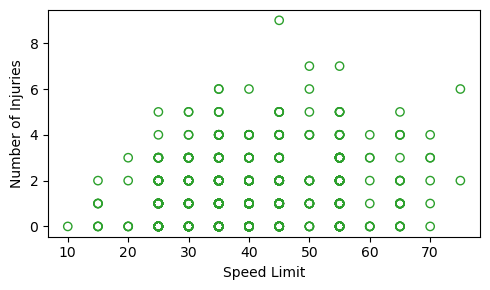

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(headOn_df.SpeedLim, headOn_df.InjuryNum, color='C2', facecolor='none')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()

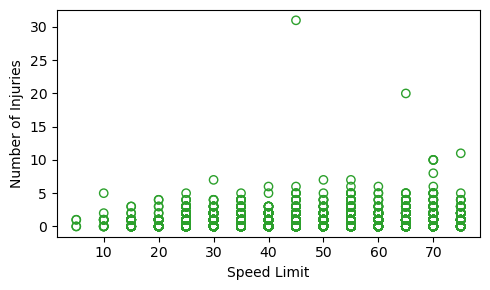

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(noCol_df.SpeedLim, noCol_df.InjuryNum, color='C2', facecolor='none')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()

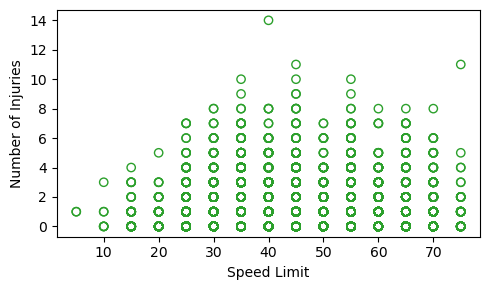

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(otherCol_df.SpeedLim, otherCol_df.InjuryNum, color='C2', facecolor='none')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')

plt.tight_layout()
plt.show()

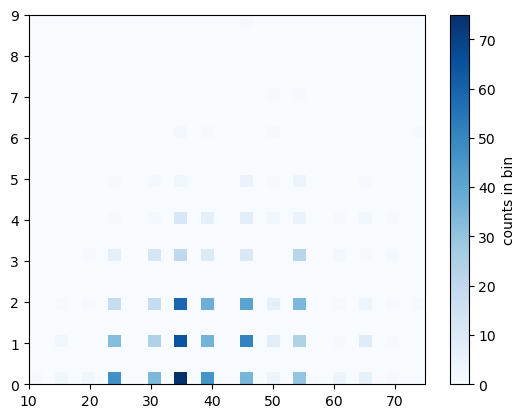

In [36]:
plt.hist2d(headOn_df.SpeedLim, headOn_df.InjuryNum, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

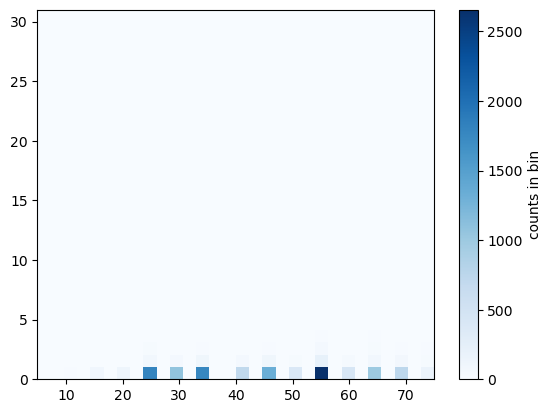

In [44]:
plt.hist2d(noCol_df.SpeedLim, noCol_df.InjuryNum, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

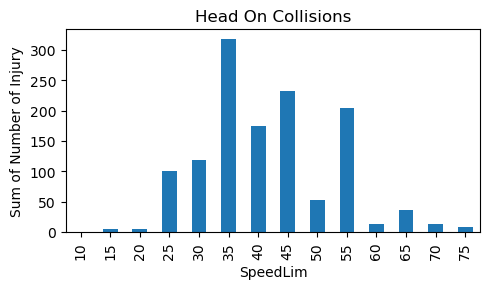

In [153]:
ax = headOn_df.groupby('SpeedLim').sum().InjuryNum.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Injury')
ax.set_title('Head On Collisions')

plt.tight_layout()
plt.show()

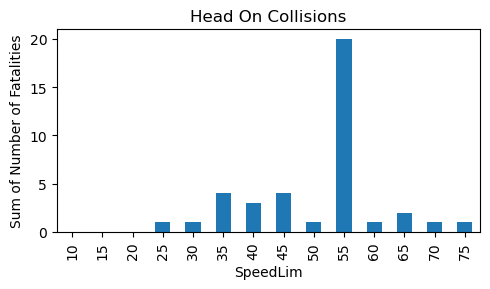

In [154]:
ax = headOn_df.groupby('SpeedLim').sum().Fatal.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Fatalities')
ax.set_title('Head On Collisions')

plt.tight_layout()
plt.show()

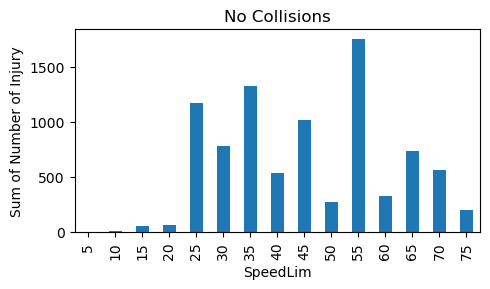

In [155]:
ax = noCol_df.groupby('SpeedLim').sum().InjuryNum.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Injury')
ax.set_title('No Collisions')
plt.tight_layout()
plt.show()

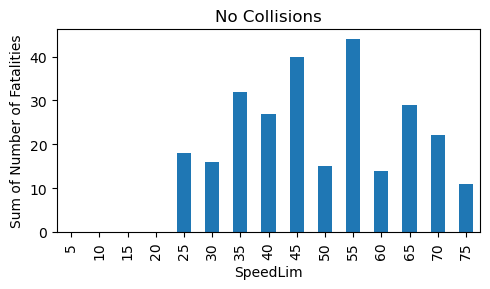

In [156]:
ax = noCol_df.groupby('SpeedLim').sum().Fatal.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('Sum of Number of Fatalities')
ax.set_title('No Collisions')
plt.tight_layout()
plt.show()

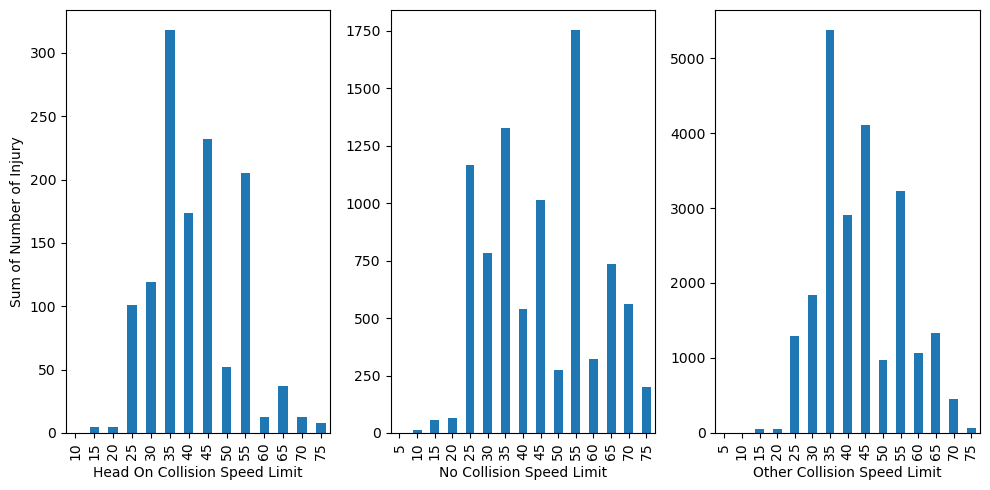

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby('SpeedLim').sum().InjuryNum.plot(kind='bar',ax=ax1)
ax1.set_ylabel('Sum of Number of Injury')
ax1.set_xlabel('Head On Collision Speed Limit')

ax2 = noCol_df.groupby('SpeedLim').sum().InjuryNum.plot(kind='bar',ax=ax2)

ax2.set_xlabel('No Collision Speed Limit')

ax3 = otherCol_df.groupby('SpeedLim').sum().InjuryNum.plot(kind='bar',ax=ax3)

ax3.set_xlabel('Other Collision Speed Limit')



plt.tight_layout()
plt.show()

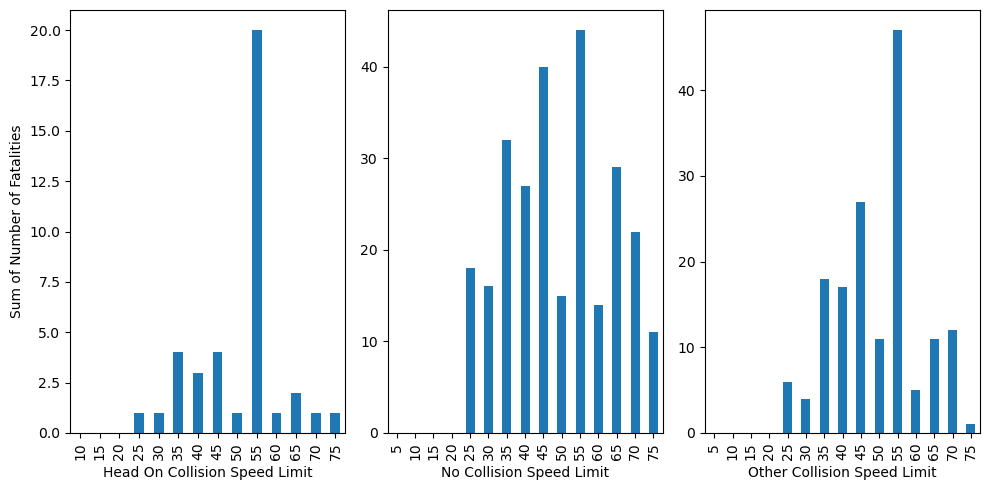

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby('SpeedLim').sum().Fatal.plot(kind='bar',ax=ax1)
ax1.set_ylabel('Sum of Number of Fatalities')
ax1.set_xlabel('Head On Collision Speed Limit')

ax2 = noCol_df.groupby('SpeedLim').sum().Fatal.plot(kind='bar',ax=ax2)

ax2.set_xlabel('No Collision Speed Limit')

ax3 = otherCol_df.groupby('SpeedLim').sum().Fatal.plot(kind='bar',ax=ax3)

ax3.set_xlabel('Other Collision Speed Limit')



plt.tight_layout()
plt.show()

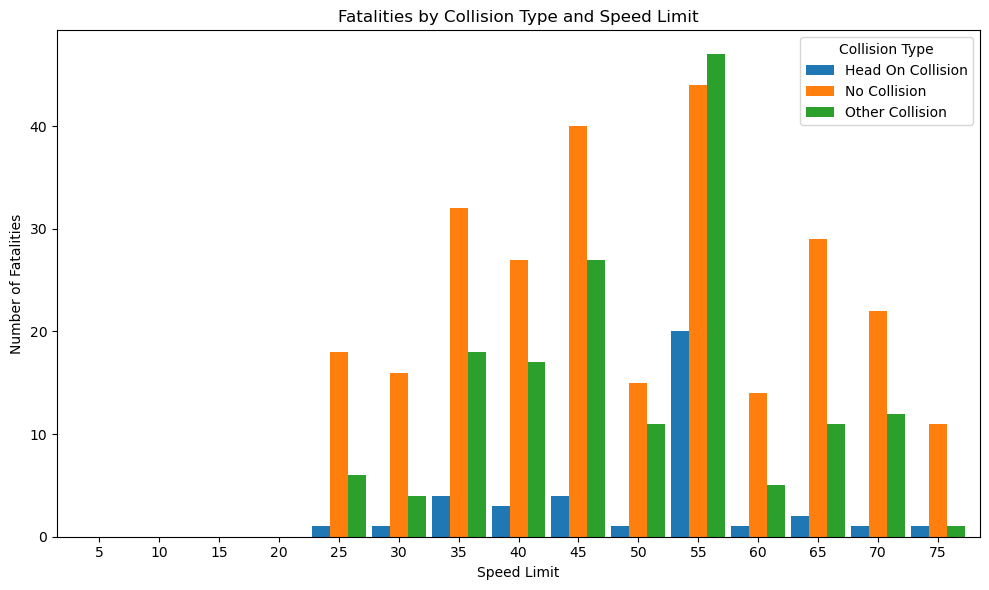

In [70]:
#turns out headOn had 1 less index as the others... so this aligns the indices
headOn_df_aligned = headOn_df.groupby('SpeedLim').sum()['Fatal'].reindex(noCol_df.groupby('SpeedLim').sum().index)

combined_df = pd.concat([headOn_df_aligned, 
                         noCol_df.groupby('SpeedLim').sum()['Fatal'], 
                         otherCol_df.groupby('SpeedLim').sum()['Fatal']], 
                        axis=1)

combined_df.columns = ['Head On Collision', 'No Collision', 'Other Collision']


combined_df.plot(kind='bar', figsize=(10, 6), width=.9)

plt.xlabel('Speed Limit')
plt.ylabel('Number of Fatalities')
plt.title('Fatalities by Collision Type and Speed Limit')
plt.xticks(rotation=0)  
plt.legend(title='Collision Type')

plt.tight_layout()
plt.show()

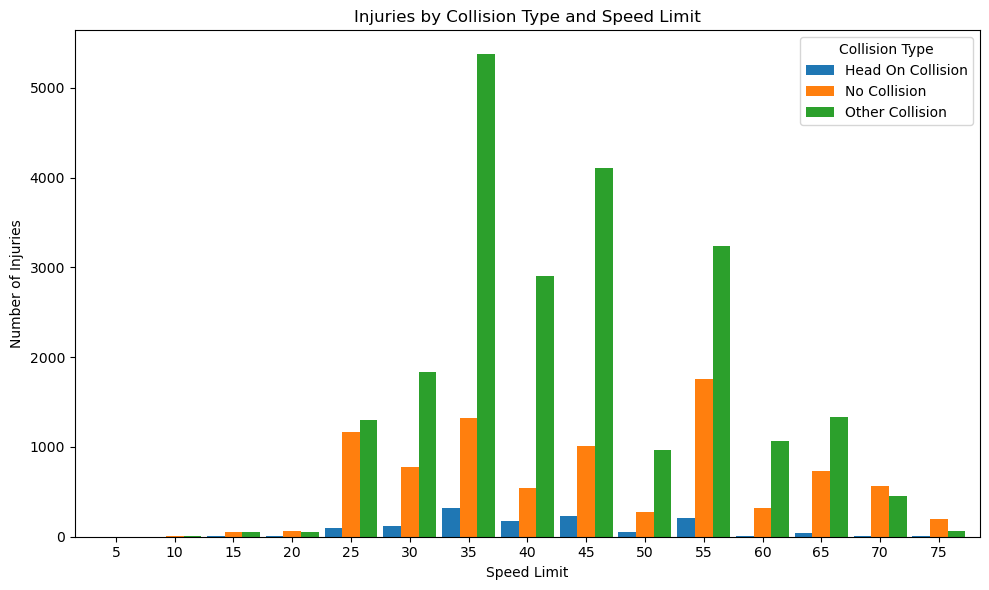

In [71]:
#turns out headOn had 1 less index as the others... so this aligns the indices
headOn_df_aligned = headOn_df.groupby('SpeedLim').sum()['InjuryNum'].reindex(noCol_df.groupby('SpeedLim').sum().index)

combined_df = pd.concat([headOn_df_aligned, 
                         noCol_df.groupby('SpeedLim').sum()['InjuryNum'], 
                         otherCol_df.groupby('SpeedLim').sum()['InjuryNum']], 
                        axis=1)

combined_df.columns = ['Head On Collision', 'No Collision', 'Other Collision']


combined_df.plot(kind='bar', figsize=(10, 6), width=.9)

plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')
plt.title('Injuries by Collision Type and Speed Limit')
plt.xticks(rotation=0)  
plt.legend(title='Collision Type')

plt.tight_layout()
plt.show()

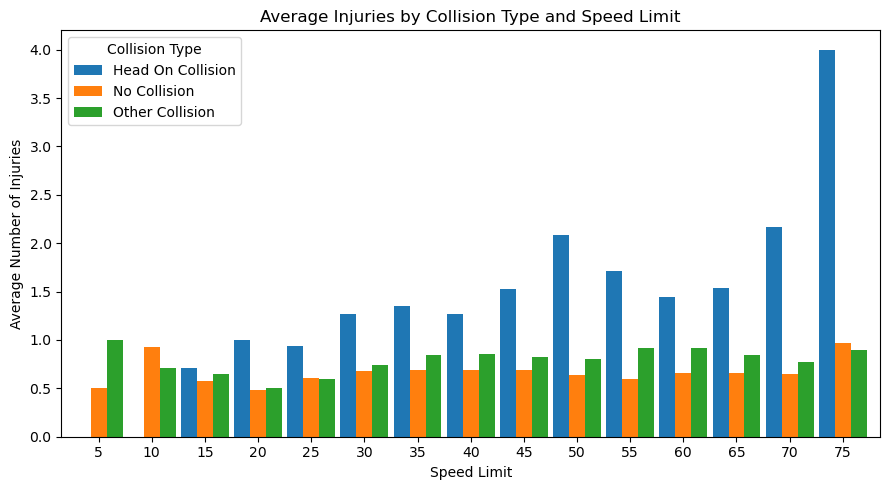

In [159]:
#turns out headOn had 1 less index as the others... so this aligns the indices
headOn_df_aligned = headOn_df.groupby('SpeedLim').mean().InjuryNum.reindex(noCol_df.groupby('SpeedLim').sum().index)

combined_df = pd.concat([headOn_df_aligned, 
                         noCol_df.groupby('SpeedLim').mean()['InjuryNum'], 
                         otherCol_df.groupby('SpeedLim').mean()['InjuryNum']], 
                        axis=1)

combined_df.columns = ['Head On Collision', 'No Collision', 'Other Collision']


combined_df.plot(kind='bar', figsize=(9, 5), width=.9)

plt.xlabel('Speed Limit')
plt.ylabel('Average Number of Injuries')
plt.title('Average Injuries by Collision Type and Speed Limit')
plt.xticks(rotation=0)  
plt.legend(title='Collision Type')

plt.tight_layout()
plt.show()

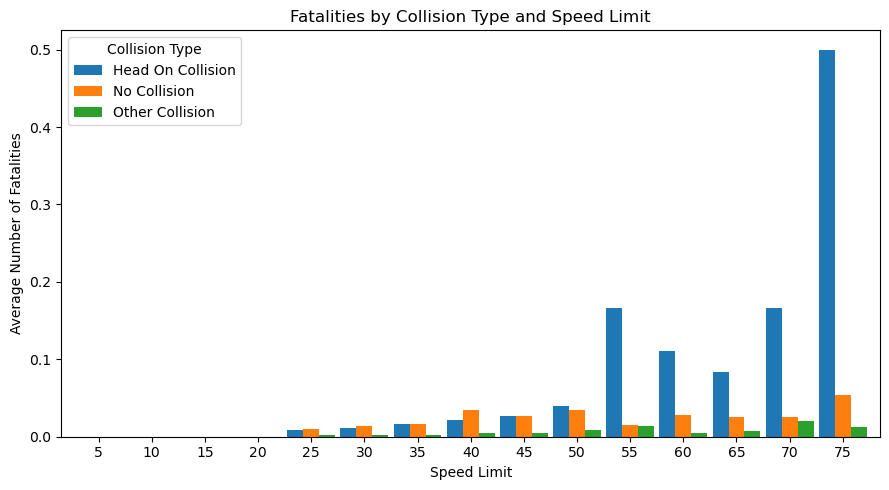

In [160]:
#turns out headOn had 1 less index as the others... so this aligns the indices
headOn_df_aligned = headOn_df.groupby('SpeedLim').mean().Fatal.reindex(noCol_df.groupby('SpeedLim').sum().index)

combined_df = pd.concat([headOn_df_aligned, 
                         noCol_df.groupby('SpeedLim').mean()['Fatal'], 
                         otherCol_df.groupby('SpeedLim').mean()['Fatal']], 
                        axis=1)

combined_df.columns = ['Head On Collision', 'No Collision', 'Other Collision']


combined_df.plot(kind='bar', figsize=(9, 5), width=.9)

plt.xlabel('Speed Limit')
plt.ylabel('Average Number of Fatalities')
plt.title('Fatalities by Collision Type and Speed Limit')
plt.xticks(rotation=0)  
plt.legend(title='Collision Type')

plt.tight_layout()
plt.show()

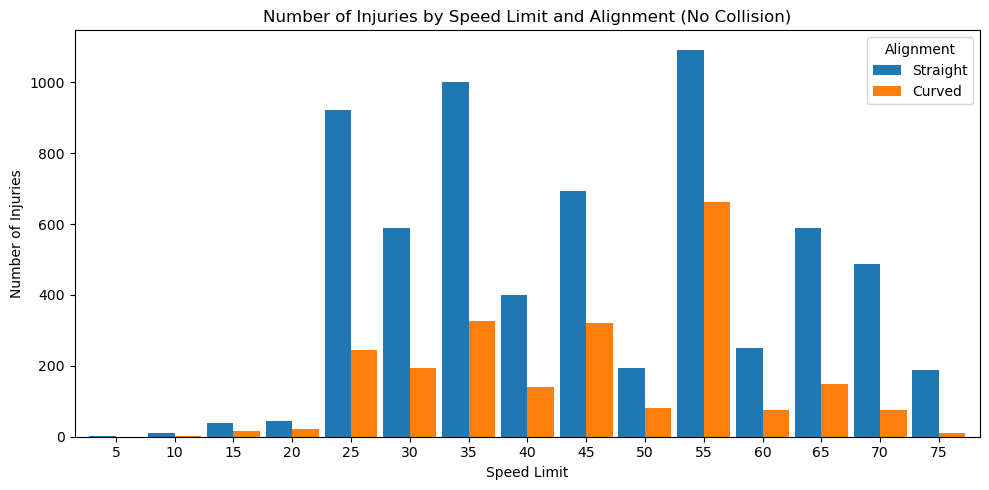

In [161]:
noCol_df.groupby(['SpeedLim', 'Align']).sum().InjuryNum.unstack().plot(kind='bar',figsize=(10, 5), width=0.9)


plt.title('Number of Injuries by Speed Limit and Alignment (No Collision)')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.legend(['Straight', 'Curved'],title='Alignment')


plt.tight_layout()
plt.show()

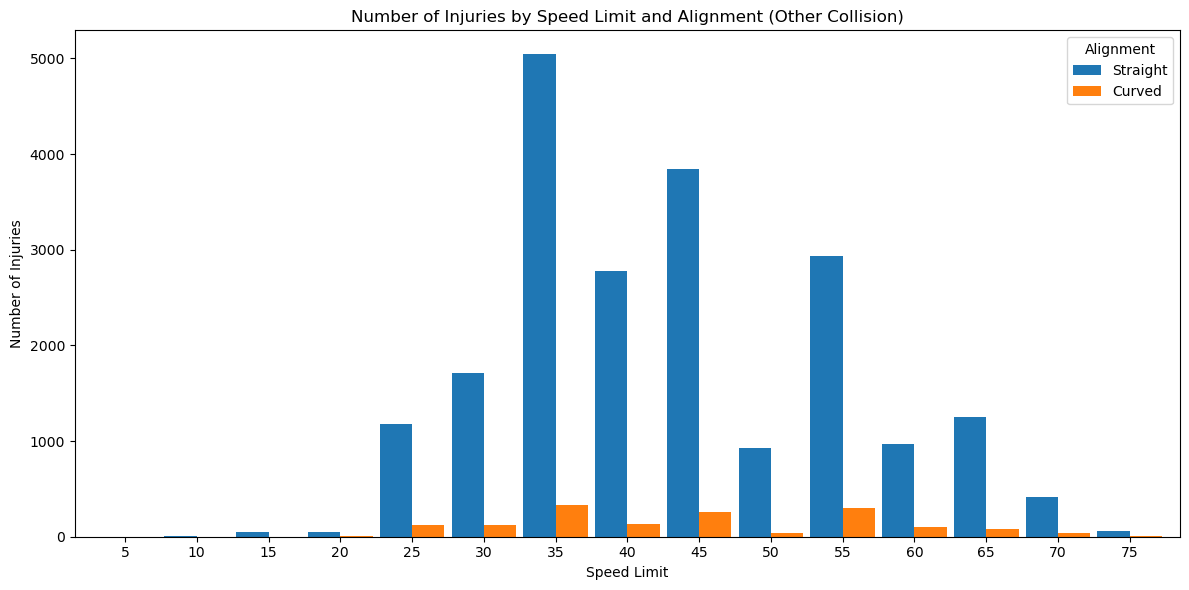

In [103]:
otherCol_df.groupby(['SpeedLim', 'Align']).sum().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9)

plt.title('Number of Injuries by Speed Limit and Alignment (Other Collision)')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.legend(['Straight', 'Curved'],title='Alignment')


plt.tight_layout()
plt.show()

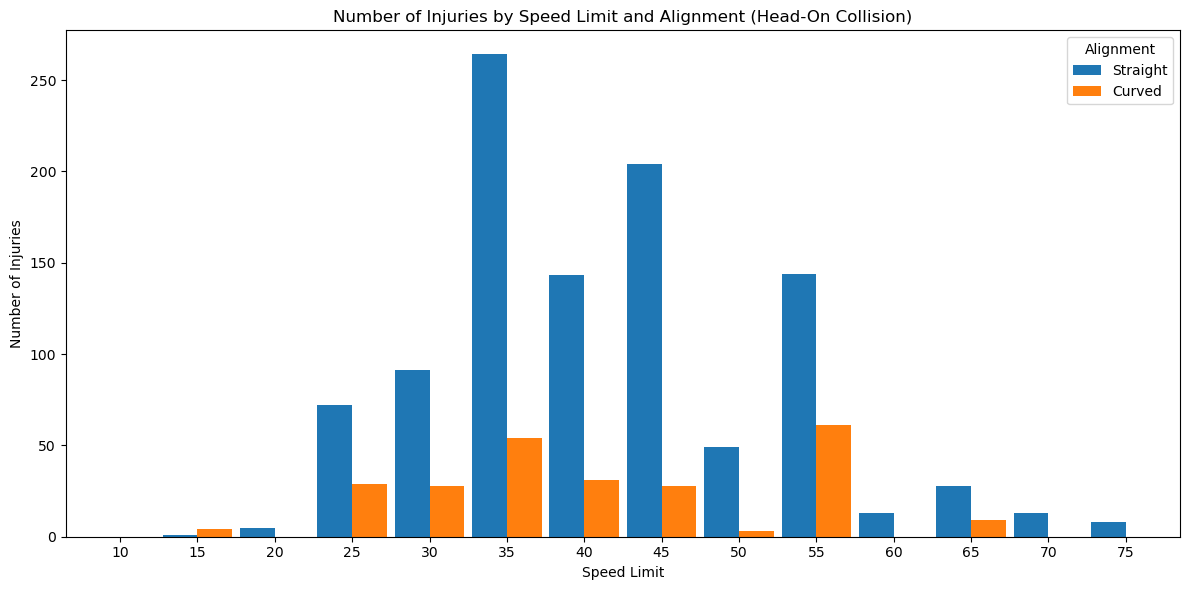

In [104]:
headOn_df.groupby(['SpeedLim', 'Align']).sum().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9)

plt.title('Number of Injuries by Speed Limit and Alignment (Head-On Collision)')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.legend(['Straight', 'Curved'],title='Alignment')


plt.tight_layout()
plt.show()

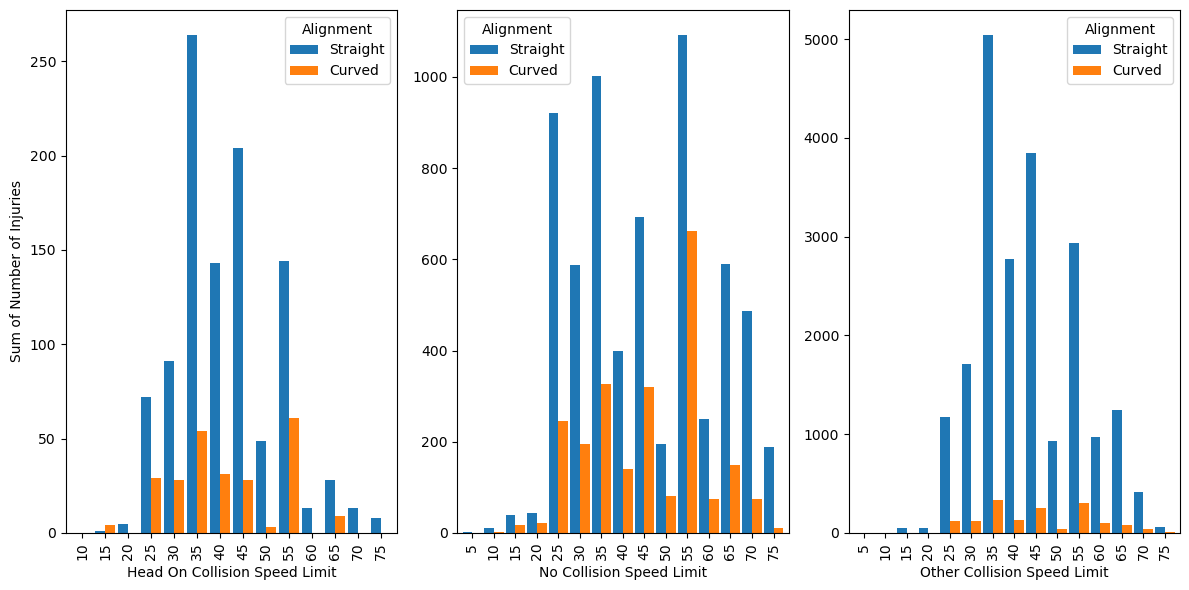

In [111]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby(['SpeedLim', 'Align']).sum().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax1)
ax2 = noCol_df.groupby(['SpeedLim', 'Align']).sum().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax2)
ax3 = otherCol_df.groupby(['SpeedLim', 'Align']).sum().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax3)
ax1.set_ylabel('Sum of Number of Injuries')
ax1.set_xlabel('Head On Collision Speed Limit')
ax2.set_xlabel('No Collision Speed Limit')
ax3.set_xlabel('Other Collision Speed Limit')

ax1.legend(['Straight', 'Curved'],title='Alignment')

ax2.legend(['Straight', 'Curved'],title='Alignment')

ax3.legend(['Straight', 'Curved'],title='Alignment')

plt.tight_layout()
plt.show()

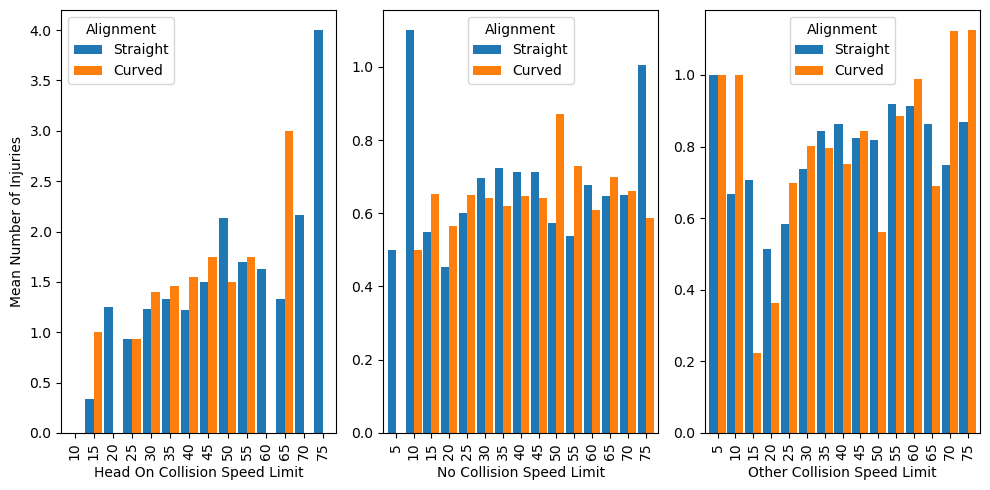

In [162]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby(['SpeedLim', 'Align']).mean().InjuryNum.unstack().plot(kind='bar', width=0.9, ax=ax1)
ax2 = noCol_df.groupby(['SpeedLim', 'Align']).mean().InjuryNum.unstack().plot(kind='bar', width=0.9, ax=ax2)
ax3 = otherCol_df.groupby(['SpeedLim', 'Align']).mean().InjuryNum.unstack().plot(kind='bar', width=0.9, ax=ax3)
ax1.set_ylabel('Mean Number of Injuries')
ax1.set_xlabel('Head On Collision Speed Limit')
ax2.set_xlabel('No Collision Speed Limit')
ax3.set_xlabel('Other Collision Speed Limit')

ax1.legend(['Straight', 'Curved'],title='Alignment')

ax2.legend(['Straight', 'Curved'],title='Alignment')

ax3.legend(['Straight', 'Curved'],title='Alignment')

plt.tight_layout()
plt.show()

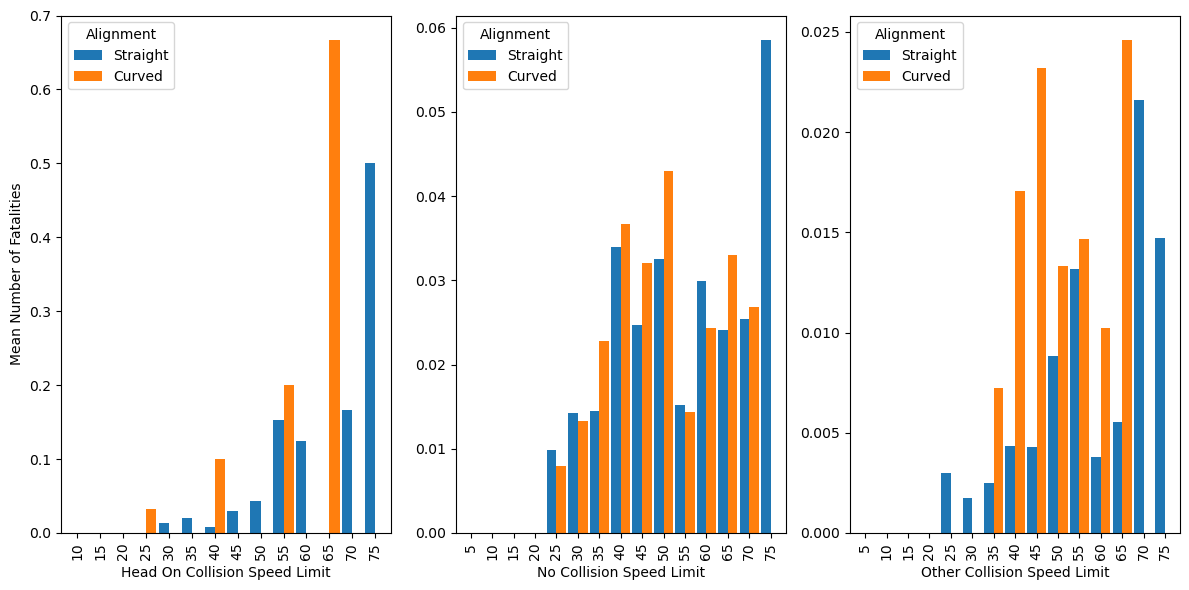

In [163]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby(['SpeedLim', 'Align']).mean().Fatal.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax1)
ax2 = noCol_df.groupby(['SpeedLim', 'Align']).mean().Fatal.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax2)
ax3 = otherCol_df.groupby(['SpeedLim', 'Align']).mean().Fatal.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax3)
ax1.set_ylabel('Mean Number of Fatalities')
ax1.set_xlabel('Head On Collision Speed Limit')
ax2.set_xlabel('No Collision Speed Limit')
ax3.set_xlabel('Other Collision Speed Limit')

ax1.legend(['Straight', 'Curved'],title='Alignment')

ax2.legend(['Straight', 'Curved'],title='Alignment')

ax3.legend(['Straight', 'Curved'],title='Alignment')

plt.tight_layout()
plt.show()

In [113]:
headOn_df

,Collision,InjuryNum,Fatal,Align,PedInvolved,SpeedLim,VehNum
12,1,2,0,1,0,40,4
95,1,1,0,1,0,55,2
167,1,3,0,1,0,30,2
207,1,1,0,1,0,35,2
240,1,0,0,1,0,45,2
...,...,...,...,...,...,...,...
39125,1,2,0,1,0,55,2
39126,1,2,0,1,0,55,2
39127,1,0,0,1,0,55,2
39128,1,4,1,1,0,70,2


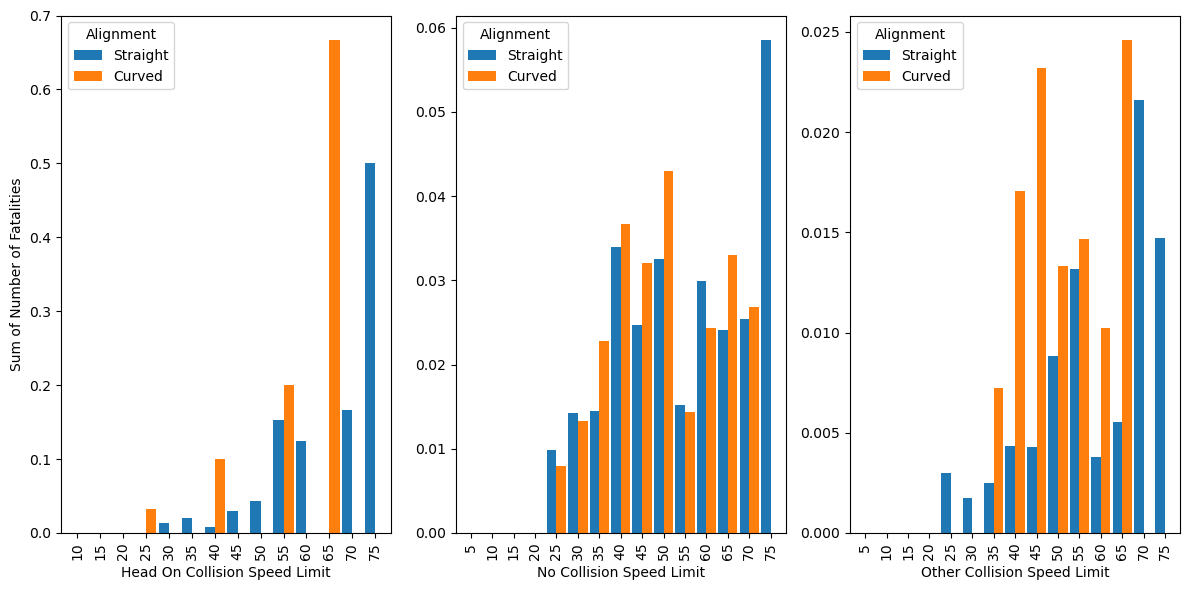

In [114]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby(['SpeedLim', 'Align']).mean().Fatal.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax1)
ax2 = noCol_df.groupby(['SpeedLim', 'Align']).mean().Fatal.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax2)
ax3 = otherCol_df.groupby(['SpeedLim', 'Align']).mean().Fatal.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax3)
ax1.set_ylabel('Sum of Number of Fatalities')
ax1.set_xlabel('Head On Collision Speed Limit')
ax2.set_xlabel('No Collision Speed Limit')
ax3.set_xlabel('Other Collision Speed Limit')

ax1.legend(['Straight', 'Curved'],title='Alignment')

ax2.legend(['Straight', 'Curved'],title='Alignment')

ax3.legend(['Straight', 'Curved'],title='Alignment')

plt.tight_layout()
plt.show()

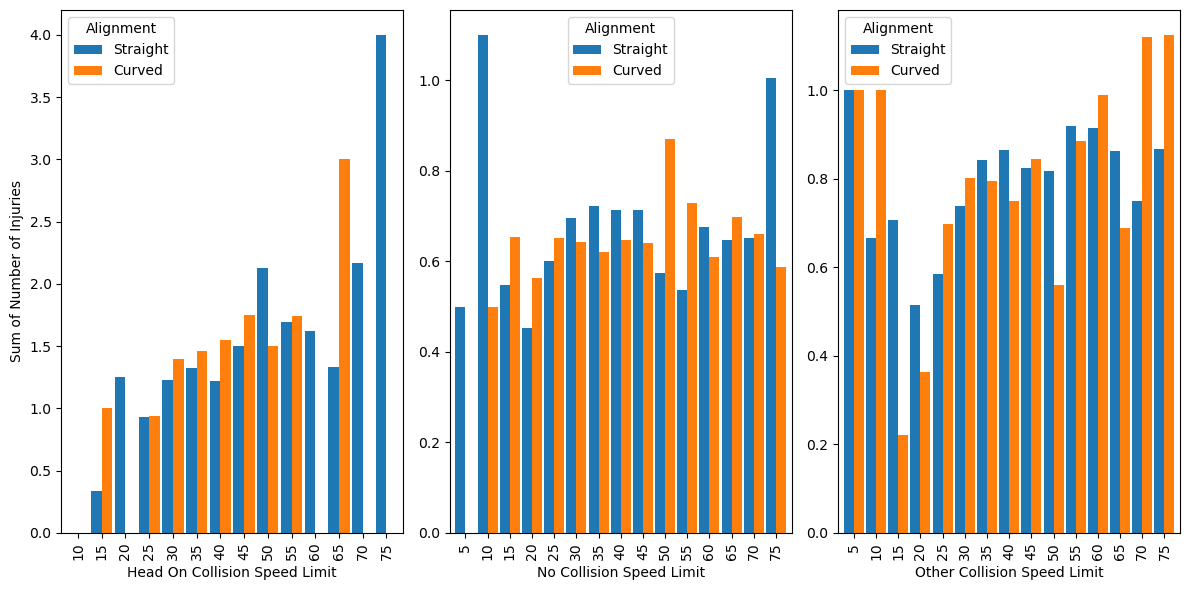

In [115]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby(['SpeedLim', 'Align']).mean().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax1)
ax2 = noCol_df.groupby(['SpeedLim', 'Align']).mean().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax2)
ax3 = otherCol_df.groupby(['SpeedLim', 'Align']).mean().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax3)
ax1.set_ylabel('Sum of Number of Injuries')
ax1.set_xlabel('Head On Collision Speed Limit')
ax2.set_xlabel('No Collision Speed Limit')
ax3.set_xlabel('Other Collision Speed Limit')

ax1.legend(['Straight', 'Curved'],title='Alignment')

ax2.legend(['Straight', 'Curved'],title='Alignment')

ax3.legend(['Straight', 'Curved'],title='Alignment')

plt.tight_layout()
plt.show()

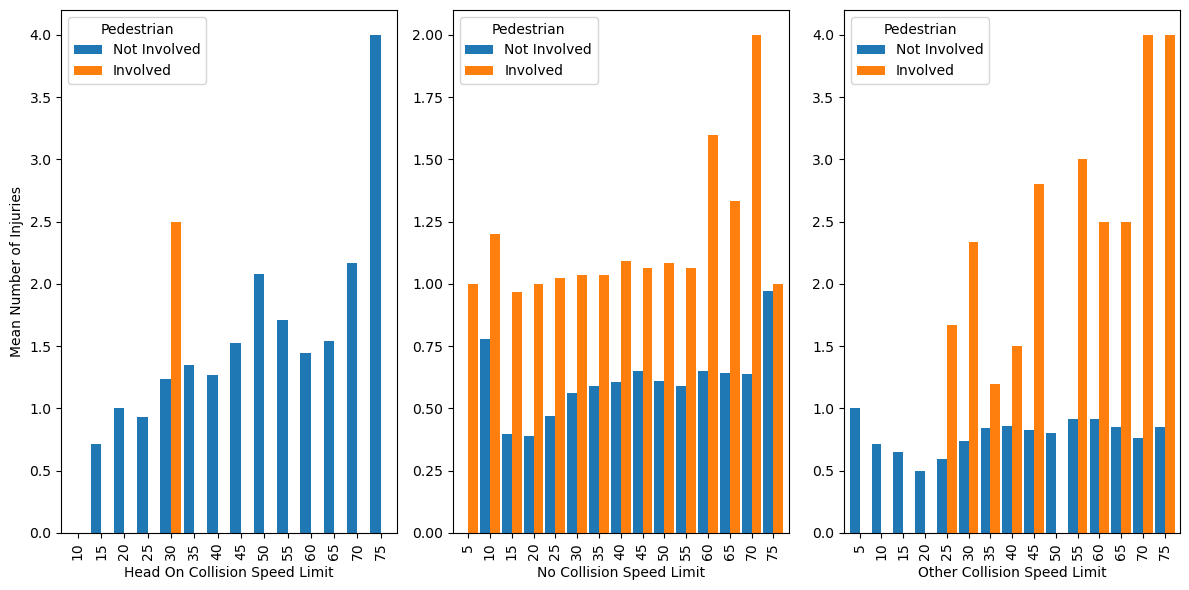

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) 
ax1 = headOn_df.groupby(['SpeedLim', 'PedInvolved']).mean().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax1)
ax2 = noCol_df.groupby(['SpeedLim', 'PedInvolved']).mean().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax2)
ax3 = otherCol_df.groupby(['SpeedLim', 'PedInvolved']).mean().InjuryNum.unstack().plot(kind='bar',figsize=(12, 6), width=0.9, ax=ax3)
ax1.set_ylabel('Mean Number of Injuries')
ax1.set_xlabel('Head On Collision Speed Limit')
ax2.set_xlabel('No Collision Speed Limit')
ax3.set_xlabel('Other Collision Speed Limit')

ax1.legend(['Not Involved', 'Involved'],title='Pedestrian')

ax2.legend(['Not Involved', 'Involved'],title='Pedestrian')

ax3.legend(['Not Involved', 'Involved'],title='Pedestrian')

plt.tight_layout()
plt.show()

In [132]:
acc_df2

,Collision,InjuryNum,Fatal,Align,PedInvolved,SpeedLim,VehNum
0,0,1,0,2,0,40,1
1,2,0,0,1,0,70,2
2,2,0,0,1,0,35,2
3,2,0,0,1,0,35,2
4,2,0,0,1,0,25,3
...,...,...,...,...,...,...,...
42178,0,0,0,1,0,45,1
42179,0,1,0,1,0,55,1
42180,0,0,0,2,0,55,1
42181,0,0,0,1,0,65,1


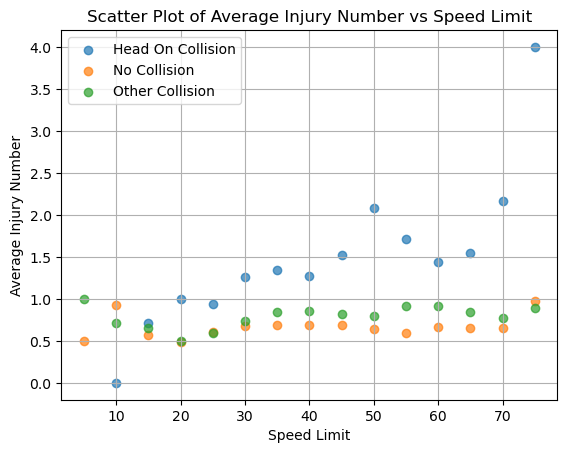

In [164]:

headOnInj = headOn_df.groupby('SpeedLim').mean().InjuryNum
noColInj = noCol_df.groupby('SpeedLim').mean().InjuryNum
otherColInj = otherCol_df.groupby('SpeedLim').mean().InjuryNum

plt.scatter(headOnInj.index, headOnInj.values, label='Head On Collision', alpha=0.7)
plt.scatter(noColInj.index, noColInj.values, label='No Collision', alpha=0.7)
plt.scatter(otherColInj.index, otherColInj.values, label='Other Collision', alpha=0.7)


plt.xlabel('Speed Limit')
plt.ylabel('Average Injury Number')
plt.title('Scatter Plot of Average Injury Number vs Speed Limit')
plt.legend()
plt.grid(True)

plt.show()

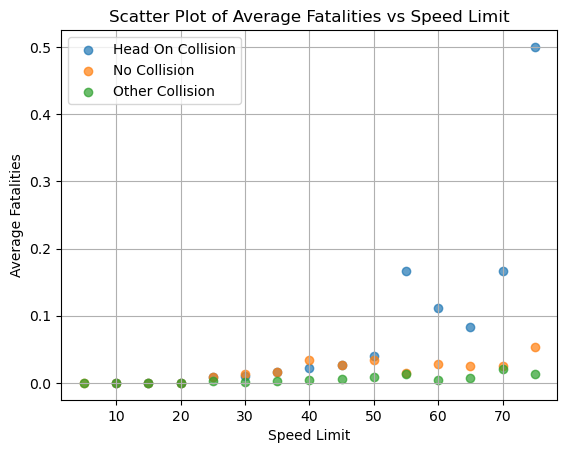

In [166]:
headOnFatal = headOn_df.groupby('SpeedLim').mean().Fatal
noColFatal = noCol_df.groupby('SpeedLim').mean().Fatal
otherColFatal = otherCol_df.groupby('SpeedLim').mean().Fatal

plt.scatter(headOnFatal.index, headOnFatal.values, label='Head On Collision', alpha=0.7)
plt.scatter(noColFatal.index, noColFatal.values, label='No Collision', alpha=0.7)
plt.scatter(otherColFatal.index, otherColFatal.values, label='Other Collision', alpha=0.7)

plt.xlabel('Speed Limit')
plt.ylabel('Average Fatalities')
plt.title('Scatter Plot of Average Fatalities vs Speed Limit')
plt.legend()
plt.grid(True)


plt.show()
